**DIỀN VÀO ...** NẾU BẠN THẤY CÂU **"WRITE YOUR CODE HERE"**

#Phân loại cảm xúc từ các bình luận sản phẩm



Hãy import các thư viện. Bạn nên cài **nltk** trước khi thực hiện lab này.

In [5]:
import sklearn, pandas
import numpy as np

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

#Đọc một số dữ liệu bình luận sản phẩm

Hãy load các bình luận cho một tập các sản phẩm dành cho trẻ sơ sinh. Tập dữ liệu này tên là **"amazon_baby.csv"**.

In [2]:
# WRITE YOUR CODE HERE
products = pandas.read_csv("amazon_baby.csv")

#Hãy cùng nhau khám phá dữ liệu này

Dữ liệu gồm tên sản phẩm, văn bản bình luận và xếp hạng của bình luận.

In [3]:
products.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


#Hãy xây dựng vectơ word count (đếm từ) cho từng bình luận

Nếu bạn không quen với nltk, hãy xem các hướng dẫn sau:

* [Xử Lý Ngôn Ngữ Tự Nhiên với Python và NLTK](https://viblo.asia/s/xu-ly-ngon-ngu-tu-nhien-voi-python-Je5Ejz9wKnL)

* [Xây Dựng Chatbot Bằng NLTK & Keras – Python Chatbot Project](https://ngoton.it/huong-dan-xay-dung-chatbot-bang-nltk-va-keras/)

* [Hướng dẫn NLP bằng Python NLTK (Ví dụ đơn giản)](https://www.datacamp.com/tutorial/text-analytics-beginners-nltk)


Chúng ta sẽ sử dụng thư viện **nltk** để tạo vectơ count.

In [ ]:
#products['review'].dtype
from nltk.tokenize import word_tokenize


def word_count_function(string):
  """This function will return a dictionary
  where its key is the word from the string (input) and
  its value is the number of the appearance of this word in the string"""
  count = {}
  for word in word_tokenize(string.strip()):
    count[word] = count.get(word, 0) + 1

  # WRITE YOUR CODE HERE
  return count

# WRITE YOUR CODE HERE
print(products['review'].apply(type).value_counts())
# Tạo vectơ count cho các bình luận
products['word_count'] = products['review'].map(word_count_function, na_action="ignore")

review
<class 'str'>      182702
<class 'float'>       829
Name: count, dtype: int64


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\Admin/nltk_data'
    - 'c:\\Users\\Admin\\anaconda3\\nltk_data'
    - 'c:\\Users\\Admin\\anaconda3\\share\\nltk_data'
    - 'c:\\Users\\Admin\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\Admin\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [13]:
products.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


Vẽ đồ thị các sản phẩm có nhiều bình luận nhất.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#products['name'].show()
#products['name'].dropna().apply(pandas.value_counts) #.plot(kind='bar')
from collections import Counter
product_counter = Counter(products['name'].dropna().values)
print(product_counter.most_common(5))

[('Vulli Sophie the Giraffe Teether', 785), ('Simple Wishes Hands-Free Breastpump Bra, Pink, XS-L', 562), ('Infant Optics DXR-5 2.4 GHz Digital Video Baby Monitor with Night Vision', 561), ('Baby Einstein Take Along Tunes', 547), ('Cloud b Twilight Constellation Night Light, Turtle', 520)]


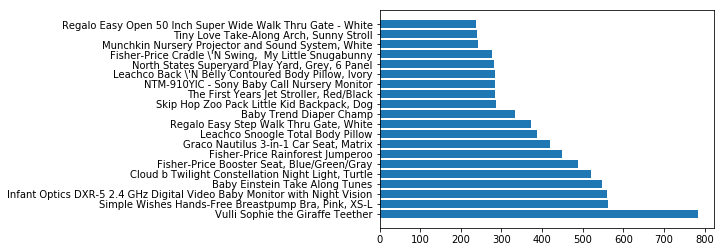

In [ ]:
# Vẽ đồ thị các sản phẩm có nhiều bình luận nhất.
best_products_plotted = 20
products_plotted = product_counter.most_common(best_products_plotted)
counter_labels, counts = zip(*products_plotted)
counter_pos = np.arange(best_products_plotted)
plt.barh(counter_pos, counts)
plt.yticks(counter_pos, counter_labels)
plt.show()

#Kiểm tra các bình luận cho sản phẩm bán chạy nhất: 'Vulli Sophie the Giraffe Teether'

In [ ]:
giraffe_reviews = products.loc[products['name'] == 'Vulli Sophie the Giraffe Teether']

In [ ]:
len(giraffe_reviews)

785

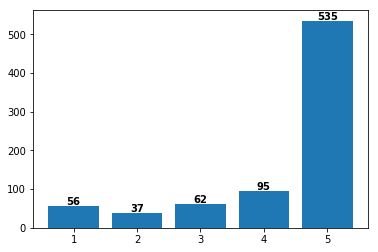

In [ ]:
#giraffe_reviews['rating'].show(view='Categorical')
rating_counter = Counter(giraffe_reviews['rating'].values)
counter_pos = np.arange(len(rating_counter))
counter_labels, counts = zip(*rating_counter.items())
plt.bar(counter_pos, counts)
plt.xticks(counter_pos, counter_labels)
for i, v in enumerate(counts):
    plt.text(x=i, y=v+4.0, s=str(v), horizontalalignment='center', color='black', fontweight="bold")
plt.show()

#Xây dựng một bộ phân loại cảm xúc

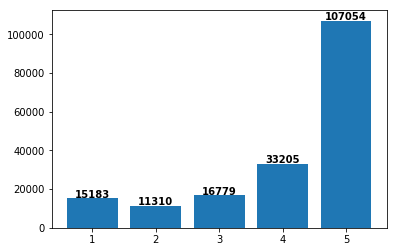

In [ ]:
#products['rating'].show(view='Categorical')

# WRITE YOUR CODE HERE
# Xây dựng một vectơ rating count (số lượng mỗi rating)
rating_counter = Counter(products[ ... ].values)
counter_pos = np.arange(len(rating_counter))
counter_labels, counts = zip(*rating_counter.items())
plt.bar(counter_pos, counts)
plt.xticks(counter_pos, counter_labels)
for i, v in enumerate(counts):
    plt.text(x=i, y=v+500.0, s=str(v), horizontalalignment='center', color='black', fontweight="bold")
plt.show()

##Xác định một câu là tích cực hay tiêu cực

Chúng ta sẽ bỏ qua tất cả các bình luận có rating = 3, vì chúng có xu hướng trung lập. Các bài bình luận có rating là 4 hoặc cao hơn sẽ được coi là tích cực, trong khi các bài bình luận từ 2 trở xuống là tiêu cực.

In [ ]:
#bỏ qua các bình luận 3*

# WRITE YOUR CODE HERE
products = products.loc[ ... ]

In [ ]:
#tích cực = bình luận 4* hoặc 5*

# WRITE YOUR CODE HERE
products['sentiment'] = ...

In [ ]:
products.head()

,name,review,rating,word_count,sentiment
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,"{'recommend': 1, 'wise': 1, 'now': 1, 'moist':...",True
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,"{'of': 1, 'for': 1, '...': 2, 'type': 1, 'size...",True
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,"{'positive': 1, 'ingenious': 1, 'losing': 1, '...",True
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,"{'all': 1, 'save': 1, 'great': 1, 'for': 2, 'g...",True
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,"{'great': 1, 'we': 2, 'how': 1, 'Fairy': 3, 't...",True


##Hãy huấn luyện bộ phân loại cảm xúc với LogisticRegression

In [ ]:
# WRITE YOUR CODE HERE
# xây dựng mô hình LogisticRegression
from sklearn.model_selection import ...
train_data, test_data = train_test_split(products.dropna(subset=("review", "sentiment")), train_size=0.8, test_size=0.2, random_state=0)
#train_data,test_data = products.random_split(.8, seed=0)
print(len(train_data), len(test_data))

132780 33195


In [ ]:
# tạo dữ liệu huấn luyện và kiểm tra
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(tokenizer=word_tokenize)
train_features = vectorizer.fit_transform(train_data['review'].values)
train_labels = train_data['sentiment'].astype(int).values
test_features = vectorizer.transform(test_data['review'].values)
test_labels = test_data['sentiment'].astype(int).values

In [ ]:
# WRITE YOUR CODE HERE
from sklearn.linear_model import ...
sentiment_model = LogisticRegression(max_iter=1000).fit( ... , ... )

/home/quan/Workspace/workspace/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#Đánh giá mô hình cảm xúc

In [ ]:
print(sentiment_model.predict_proba(test_features[:2]))
print(sentiment_model.predict(test_features[:2]))

[[1.20244024e-04 9.99879756e-01]
 [9.99986351e-01 1.36488683e-05]]
[1 0]


Model score: 0.935261334538334
FPR/TPR amount: 3268 3268


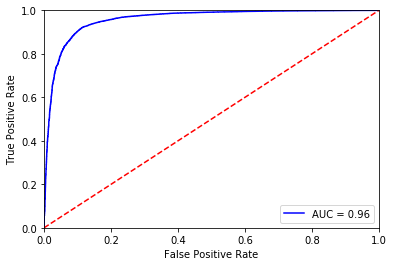

In [ ]:
#sentiment_model.evaluate(test_data, metric='roc_curve')
from sklearn.metrics import roc_curve, roc_auc_score, auc
test_predictions = sentiment_model.predict_proba(test_features)[:, 1]
fpr, tpr, threshold = roc_curve(test_labels, test_predictions)
roc_auc = auc(fpr, tpr)
print("Model score:", sentiment_model.score(test_features, test_labels))
print("FPR/TPR amount:", len(fpr), len(tpr))

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

In [ ]:
#sentiment_model.show(view='Evaluation')

#Áp dụng mô hình đã học để biết cảm xúc cho các bình luận về đồ chơi Giraffe

In [ ]:
giraffe_reviews = giraffe_reviews.dropna(subset=['review'])
giraffe_reviews_features = vectorizer.transform(giraffe_reviews['review'].values)
giraffe_reviews['predicted_sentiment'] = sentiment_model.predict_proba(giraffe_reviews_features)[:, 1]

In [ ]:
giraffe_reviews.head()

,name,review,rating,word_count,predicted_sentiment
34313,Vulli Sophie the Giraffe Teether,He likes chewing on all the parts especially t...,5,"{'of': 1, 'he': 1, 'because': 1, 'the': 3, '.'...",0.998953
34314,Vulli Sophie the Giraffe Teether,My son loves this toy and fits great in the di...,5,"{'son': 1, 'great': 1, 'a': 1, 'just': 1, 'fit...",0.999739
34315,Vulli Sophie the Giraffe Teether,There really should be a large warning on the ...,1,"{'.': 2, '2011': 1, 'for': 1, 'should': 1, 'be...",0.172617
34316,Vulli Sophie the Giraffe Teether,All the moms in my moms\' group got Sophie for...,5,"{'do': 1, 'for': 1, 'was': 1, 'another': 1, 't...",0.976369
34317,Vulli Sophie the Giraffe Teether,I was a little skeptical on whether Sophie was...,5,"{'Everything': 1, 'He': 1, 'for': 1, 'going': ...",0.396807


##Sắp xếp các bình luận dựa trên cảm xúc đã dự đoán và khám phá

In [ ]:
giraffe_reviews = giraffe_reviews.sort_values('predicted_sentiment', ascending=False)

In [ ]:
giraffe_reviews.head()

,name,review,rating,word_count,predicted_sentiment
34892,Vulli Sophie the Giraffe Teether,"Sophie, oh Sophie, your time has come. My gran...",5,"{'unheard': 1, 'mouth': 1, 'prisrob': 1, 'for'...",1.0
34434,Vulli Sophie the Giraffe Teether,My Mom-in-Law bought Sophie for my son when he...,5,"{'seem': 1, 'for': 3, 'he\': 2, '''': 1, 'as':...",1.0
34515,Vulli Sophie the Giraffe Teether,"As every mom knows, you always want to give yo...",5,"{'for': 6, 'girl': 3, 'every': 1, 'long': 1, '...",1.0
34442,Vulli Sophie the Giraffe Teether,"Yes, it\'s imported. Yes, it\'s expensive. And...",5,"{'mouth': 3, 'great': 1, 'for': 2, 'at': 1, 'n...",1.0
34746,Vulli Sophie the Giraffe Teether,Sophie the Giraffe is the perfect teething toy...,5,"{'gnawed': 1, 'for': 3, 'makes': 1, 'price': 1...",1.0


##Các bình luận tích cực nhất về đồ chơi giraffe

In [ ]:
giraffe_reviews['review'].values[0]

In [ ]:
giraffe_reviews['review'].values[1]

##Các bình luận tiêu cực nhất về đồ chơi giraffe

In [ ]:
giraffe_reviews['review'].values[-1]

In [ ]:
giraffe_reviews['review'].values[-2]